In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

# About NeuralForecast

> **NeuralForecast** offers a large collection of neural forecasting models focused on their usability, and robustness. The models range from classic networks like `MLP`, `RNN`s to novel proven contributions like `NBEATS`, `NHITS`, `TFT` and other architectures.

## 🎊 Features

* **Exogenous Variables**: Static, historic and future exogenous support.
* **Forecast Interpretability**: Plot trend, seasonality and exogenous `NBEATS`, `NHITS`, `TFT`, `ESRNN` prediction components.
* **Probabilistic Forecasting**: Simple model adapters for quantile losses and parametric distributions.
* **Train and Evaluation Losses** Scale-dependent, percentage and scale independent errors, and parametric likelihoods.
* **Automatic Model Selection** Parallelized automatic hyperparameter tuning, that efficiently searches best validation configuration.
* **Simple Interface** Unified SKLearn Interface for `StatsForecast` and `MLForecast` compatibility.
* **Model Collection**: Out of the box implementation of `MLP`, `LSTM`, `RNN`, `TCN`, `DilatedRNN`, `NBEATS`, `NHITS`, `ESRNN`, `Informer`, `TFT`, `PatchTST`, `VanillaTransformer`, `StemGNN` and `HINT`. See the entire [collection here](https://nixtla.github.io/neuralforecast/models.html).

## Why?

There is a shared belief in Neural forecasting methods' capacity to improve our pipeline's accuracy and efficiency.

Unfortunately, available implementations and published research are yet to realize neural networks' potential. They are hard to use and continuously fail to improve over statistical methods while being computationally prohibitive. For this reason, we created `NeuralForecast`, a library favoring proven accurate and efficient models focusing on their usability.

## 💻 Installation


### PyPI

You can install `NeuralForecast`'s *released version* from the Python package index [pip](https://pypi.org/project/neuralforecast/) with:

```python
pip install neuralforecast
```

(Installing inside a python virtualenvironment or a conda environment is recommended.)


### Conda

Also you can install `NeuralForecast`'s *released version* from [conda](https://anaconda.org/conda-forge/neuralforecast) with:

```python
conda install -c conda-forge neuralforecast
```

(Installing inside a python virtualenvironment or a conda environment is recommended.)

### Dev Mode
If you want to make some modifications to the code and see the effects in real time (without reinstalling), follow the steps below:

```bash
git clone https://github.com/Nixtla/neuralforecast.git
cd neuralforecast
pip install -e .
```

## How to Use

In [ ]:
import logging

import pandas as pd
from utilsforecast.plotting import plot_series

from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

In [ ]:
logging.getLogger('pytorch_lightning').setLevel(logging.ERROR)

Seed set to 1
Seed set to 1


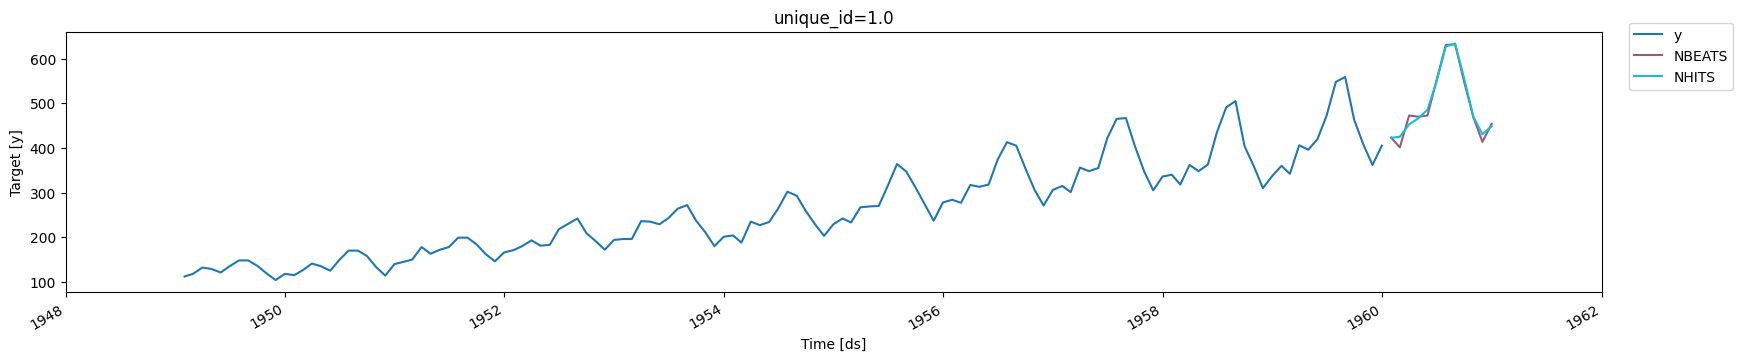

In [ ]:
# Split data and declare panel dataset
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 test

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=100, enable_progress_bar=False),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=100, enable_progress_bar=False)]
nf = NeuralForecast(models=models, freq='ME')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict()

# Plot predictions
plot_series(Y_train_df, Y_hat_df)

## 🙏 How to Cite

If you enjoy or benefit from using these Python implementations, a citation to the repository will be greatly appreciated.

```
@misc{olivares2022library_neuralforecast,
    author={Kin G. Olivares and
            Cristian Challú and
            Federico Garza and
            Max Mergenthaler Canseco and
            Artur Dubrawski},
    title = {{NeuralForecast}: User friendly state-of-the-art neural forecasting models.},
    year={2022},
    howpublished={{PyCon} Salt Lake City, Utah, US 2022},
    url={https://github.com/Nixtla/neuralforecast}
}
```